--- Original Data Generated ---
Shape of X_original: (100, 1)
Shape of y_original: (100, 1)

--- Model Trained on Original Data ---
Model Coefficient (slope): 1.77
Model Intercept: 5.22

--- Drifted Data Generated ---
Shape of X_drifted: (100, 1)
Shape of y_drifted: (100, 1)

--- Model Performance Comparison ---
Performance on Original Data:
  Mean Squared Error (MSE): 0.81
  Mean Absolute Error (MAE): 0.70


Performance on Drifted Data:
  Mean Squared Error (MSE): 3.50
  Mean Absolute Error (MAE): 1.64




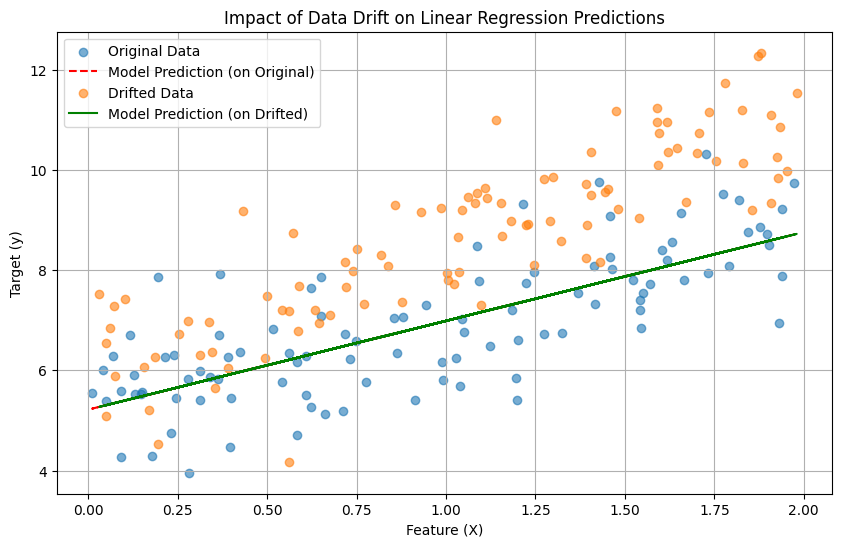

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt # Optional: for visualization

# --- Introduction ---
# This script demonstrates the impact of data drift on a simple linear regression model.
# We will:
# 1. Generate synthetic "original" data.
# 2. Train a linear regression model on the original data.
# 3. Generate "drifted" data where the relationship between feature and target changes slightly.
# 4. Evaluate the trained model on both original and drifted data.
# 5. Compare the prediction errors to show the effect of drift.

# --- 1. Generate Original Data ---
# Create a simple linear relationship: y = 2*X + 5 + noise
np.random.seed(42) # for reproducibility
X_original = 2 * np.random.rand(100, 1) # 100 samples, 1 feature
y_original = 5 + 2 * X_original + np.random.randn(100, 1) # Add some noise

print("--- Original Data Generated ---")
print(f"Shape of X_original: {X_original.shape}")
print(f"Shape of y_original: {y_original.shape}\n")

# --- 2. Train a Model on the Original Data ---
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_original, y_original)

print("--- Model Trained on Original Data ---")
print(f"Model Coefficient (slope): {model.coef_[0][0]:.2f}")
print(f"Model Intercept: {model.intercept_[0]:.2f}\n")

# --- 3. Generate Drifted Data ---
# Simulate data drift by changing the relationship: y = 2.5*X + 6 + noise
# The slope and intercept have slightly changed compared to the original data.
X_drifted = 2 * np.random.rand(100, 1) # Same distribution for X for simplicity
y_drifted = 6 + 2.5 * X_drifted + np.random.randn(100, 1) # Changed relationship and intercept

print("--- Drifted Data Generated ---")
print(f"Shape of X_drifted: {X_drifted.shape}")
print(f"Shape of y_drifted: {y_drifted.shape}\n")

# --- 4. Evaluate on Original and Drifted Data ---
# Make predictions using the model trained on original data
y_pred_original = model.predict(X_original)
y_pred_drifted = model.predict(X_drifted)

# --- 5. Compare Errors ---
# Calculate performance metrics (e.g., Mean Squared Error, Mean Absolute Error)

mse_original = mean_squared_error(y_original, y_pred_original)
mae_original = mean_absolute_error(y_original, y_pred_original)

mse_drifted = mean_squared_error(y_drifted, y_pred_drifted)
mae_drifted = mean_absolute_error(y_drifted, y_pred_drifted)

print("--- Model Performance Comparison ---")
print(f"Performance on Original Data:")
print(f"  Mean Squared Error (MSE): {mse_original:.2f}")
print(f"  Mean Absolute Error (MAE): {mae_original:.2f}")
print("\n")
print(f"Performance on Drifted Data:")
print(f"  Mean Squared Error (MSE): {mse_drifted:.2f}")
print(f"  Mean Absolute Error (MAE): {mae_drifted:.2f}")
print("\n")

# --- Optional: Visualization ---
# Plot the original data, drifted data, and the model's predictions
plt.figure(figsize=(10, 6))

# Plot original data and predictions
plt.scatter(X_original, y_original, label='Original Data', alpha=0.6)
plt.plot(X_original, y_pred_original, color='red', linestyle='--', label='Model Prediction (on Original)')

# Plot drifted data and predictions
plt.scatter(X_drifted, y_drifted, label='Drifted Data', alpha=0.6)
# Plot predictions of the *original* model on the *drifted* X values
plt.plot(X_drifted, y_pred_drifted, color='green', linestyle='-', label='Model Prediction (on Drifted)')


plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Impact of Data Drift on Linear Regression Predictions")
plt.legend()
plt.grid(True)
plt.show()

# --- Conclusion ---
# As you can see from the error metrics (MSE and MAE) and the plot,
# the model trained on the original data performs worse (higher errors)
# when evaluated on the drifted data, demonstrating the impact of data drift.





In [7]:
import numpy as np

# --- Introduction ---
# This script demonstrates monitoring feature distribution changes
# using basic statistics (mean and standard deviation) to detect potential data drift.
# We will:
# 1. Generate synthetic "original" data for a feature.
# 2. Calculate statistics (mean and std dev) for the original data.
# 3. Generate synthetic "drifted" data where the feature distribution has changed.
# 4. Calculate statistics for the drifted data.
# 5. Compare the statistics and show how simple thresholds can be used for detection.

# --- 1. Generate Original Data ---
# Simulate a feature 'Feature_X' with a normal distribution
# Mean = 10, Standard Deviation = 2
np.random.seed(42) # for reproducibility
original_feature_data = np.random.normal(loc=10, scale=2, size=200) # 200 samples

print("--- Original Feature Data Generated ---")
print(f"Shape of original_feature_data: {original_feature_data.shape}\n")

# --- 2. Calculate Feature Statistics for Original Data ---
mean_original = np.mean(original_feature_data)
std_dev_original = np.std(original_feature_data)

print("--- Statistics for Original Data ---")
print(f"Mean: {mean_original:.2f}")
print(f"Standard Deviation: {std_dev_original:.2f}\n")

# --- 3. Generate Drifted Data ---
# Simulate data drift by changing the distribution of 'Feature_X'
# Let's shift the mean and slightly change the standard deviation
# New Mean = 12, New Standard Deviation = 2.5
drifted_feature_data = np.random.normal(loc=12, scale=2.5, size=200) # 200 samples

print("--- Drifted Feature Data Generated ---")
print(f"Shape of drifted_feature_data: {drifted_feature_data.shape}\n")

# --- 4. Calculate Feature Statistics for Drifted Data ---
mean_drifted = np.mean(drifted_feature_data)
std_dev_drifted = np.std(drifted_feature_data)

print("--- Statistics for Drifted Data ---")
print(f"Mean: {mean_drifted:.2f}")
print(f"Standard Deviation: {std_dev_drifted:.2f}\n")

# --- 5. Compare Statistics and Set Thresholds ---
# Calculate the absolute difference in mean and standard deviation
mean_difference = abs(mean_drifted - mean_original)
std_dev_difference = abs(std_dev_drifted - std_dev_original)

print("--- Comparison of Statistics ---")
print(f"Absolute difference in Mean: {mean_difference:.2f}")
print(f"Absolute difference in Standard Deviation: {std_dev_difference:.2f}\n")

# Set simple thresholds for detection
# These thresholds would typically be determined based on domain knowledge,
# historical data, or statistical tests.
mean_threshold = 0.5 # Example threshold for mean difference
std_dev_threshold = 0.3 # Example threshold for standard deviation difference

print("--- Drift Detection based on Thresholds ---")
if mean_difference > mean_threshold:
    print(f"ALERT: Significant change detected in Mean ({mean_difference:.2f} > {mean_threshold})")
else:
    print(f"Mean change ({mean_difference:.2f}) is within the threshold ({mean_threshold})")

if std_dev_difference > std_dev_threshold:
    print(f"ALERT: Significant change detected in Standard Deviation ({std_dev_difference:.2f} > {std_dev_threshold})")
else:
     print(f"Standard Deviation change ({std_dev_difference:.2f}) is within the threshold ({std_dev_threshold})")

# --- Conclusion ---
# This example shows a basic method for monitoring feature distribution shifts
# by comparing simple statistics. More sophisticated methods involve
# statistical tests (like KS test, Chi-squared test) or specialized libraries.






--- Original Feature Data Generated ---
Shape of original_feature_data: (200,)

--- Statistics for Original Data ---
Mean: 9.92
Standard Deviation: 1.86

--- Drifted Feature Data Generated ---
Shape of drifted_feature_data: (200,)

--- Statistics for Drifted Data ---
Mean: 12.21
Standard Deviation: 2.46

--- Comparison of Statistics ---
Absolute difference in Mean: 2.30
Absolute difference in Standard Deviation: 0.60

--- Drift Detection based on Thresholds ---
ALERT: Significant change detected in Mean (2.30 > 0.5)
ALERT: Significant change detected in Standard Deviation (0.60 > 0.3)


In [8]:
import pandas as pd
import numpy as np

# --- Introduction ---
# This script automates a basic data validation process using Python (pandas)
# to ensure the structural integrity of a dataset.
# We will:
# 1. Define a set of validation checks (e.g., required columns, data types).
# 2. Create a sample DataFrame to validate.
# 3. Apply the defined validation checks to the DataFrame.
# 4. Report the results of the validation.

# --- 1. Define Validation Checks ---
# Define expected structure and rules for the dataset.
# This is a dictionary where keys are column names and values are dictionaries
# specifying validation rules for that column.
validation_rules = {
    'OrderID': {
        'required': True,
        'dtype': 'int64',
        'unique': True
    },
    'CustomerID': {
        'required': True,
        'dtype': 'int64'
    },
    'ProductName': {
        'required': True,
        'dtype': 'object' # pandas uses 'object' for strings
    },
    'Price': {
        'required': True,
        'dtype': 'float64',
        'min_value': 0.0
    },
    'Quantity': {
        'required': True,
        'dtype': 'int64',
        'min_value': 1
    },
    'OrderDate': {
        'required': True,
        'dtype': 'object', # Can be validated as datetime later if needed
        'format': 'YYYY-MM-DD' # Example format check (requires more complex logic)
    },
    'ShippingStatus': {
        'required': False, # This column is optional
        'dtype': 'object',
        'allowed_values': ['Pending', 'Shipped', 'Delivered', 'Cancelled']
    }
}

print("--- Defined Validation Rules ---")
# print(validation_rules) # Uncomment to see the rules dictionary
print(f"Rules defined for {len(validation_rules)} columns.\n")


# --- 2. Create Sample Data to Validate ---
# Create a sample DataFrame. Introduce some issues for demonstration.
data = {
    'OrderID': [1, 2, 3, 4, 5, 3, 6, 7], # Duplicate OrderID
    'CustomerID': [101, 102, 103, 104, np.nan, 103, 105, 106], # Missing CustomerID
    'ProductName': ['Laptop', 'Keyboard', 'Mouse', 'Monitor', 'Webcam', 'Mouse', 'Printer', 'Mouse'],
    'Price': [1200.0, 75.5, 25.0, -10.0, 50.0, 25.0, 250.0, 75.5], # Negative Price
    'Quantity': [1, 2, 0, 1, 3, 1, 1, 2], # Zero Quantity
    'OrderDate': ['2023-01-10', '2023-01-11', '2023-01-11', '2023-01-12', '2023-01-12', '2023-01-11', '2023-01-13', '2023-01-11'],
    'ShippingStatus': ['Shipped', 'Pending', 'Delivered', 'Processing', 'Shipped', 'Delivered', 'Pending', 'Pending'] # Invalid ShippingStatus
    # Missing 'ShippingStatus' for some rows is allowed as it's not required
}

df = pd.DataFrame(data)

print("--- Sample DataFrame to Validate ---")
print(df)
print("\n")

# --- 3. Apply Validation ---

validation_errors = []

# Check for missing required columns
df_columns = set(df.columns)
required_columns = {col for col, rules in validation_rules.items() if rules.get('required', False)}
missing_required_columns = required_columns - df_columns
if missing_required_columns:
    validation_errors.append(f"Missing required columns: {', '.join(missing_required_columns)}")

# Check each column based on defined rules
for col, rules in validation_rules.items():
    if col in df.columns:
        # Check for required values (NaN/None) if column is required
        if rules.get('required', False):
            if df[col].isnull().any():
                null_count = df[col].isnull().sum()
                validation_errors.append(f"Column '{col}': Contains {null_count} missing required values.")

        # Check data type
        expected_dtype = rules.get('dtype')
        if expected_dtype and df[col].dtype != expected_dtype:
             # Note: pandas dtype checking can be complex, especially with NaNs.
             # A more robust check might involve trying to convert and catching errors.
             # This is a basic check.
             if not (pd.api.types.is_numeric_dtype(df[col].dtype) and pd.api.types.is_numeric_dtype(expected_dtype)):
                 validation_errors.append(f"Column '{col}': Incorrect data type. Expected '{expected_dtype}', got '{df[col].dtype}'.")


        # Check for uniqueness
        if rules.get('unique', False):
            if df[col].duplicated().any():
                duplicate_count = df[col].duplicated().sum()
                validation_errors.append(f"Column '{col}': Contains {duplicate_count} duplicate values.")

        # Check minimum value for numeric types
        min_value = rules.get('min_value')
        if min_value is not None and pd.api.types.is_numeric_dtype(df[col].dtype):
             # Use .all() to check if condition is true for all non-null values
             if not (df[col].dropna() >= min_value).all():
                 invalid_count = (~(df[col].dropna() >= min_value)).sum()
                 validation_errors.append(f"Column '{col}': Contains {invalid_count} values below the minimum ({min_value}).")

        # Check allowed values for categorical/object types
        allowed_values = rules.get('allowed_values')
        if allowed_values is not None and df[col].dtype == 'object':
            # Check if all non-null unique values are in the allowed list
            invalid_values = df[col].dropna()[~df[col].dropna().isin(allowed_values)].unique()
            if invalid_values.size > 0:
                 validation_errors.append(f"Column '{col}': Contains invalid values: {list(invalid_values)}")

        # # Example of format check (requires more specific implementation)
        # format_rule = rules.get('format')
        # if format_rule == 'YYYY-MM-DD' and df[col].dtype == 'object':
        #     # This is a placeholder. Actual date format validation requires parsing.
        #     try:
        #         pd.to_datetime(df[col], format='%Y-%m-%d', errors='raise')
        #     except Exception as e:
        #          validation_errors.append(f"Column '{col}': Date format validation failed. Error: {e}")


    elif col in required_columns:
         # This case is already covered by the initial check for missing required columns,
         # but included here for completeness if you wanted to report per-column.
         pass


# --- 4. Report Validation Results ---

print("--- Data Validation Results ---")
if not validation_errors:
    print("Validation Successful: No structural integrity issues found.")
else:
    print("Validation Failed: Issues found:")
    for error in validation_errors:
        print(f"- {error}")

# --- Conclusion ---
# This script provides a framework for basic automated data validation.
# You can extend the `validation_rules` dictionary and add more complex
# validation logic within the loop as needed for your specific dataset.




--- Defined Validation Rules ---
Rules defined for 7 columns.

--- Sample DataFrame to Validate ---
   OrderID  CustomerID ProductName   Price  Quantity   OrderDate  \
0        1       101.0      Laptop  1200.0         1  2023-01-10   
1        2       102.0    Keyboard    75.5         2  2023-01-11   
2        3       103.0       Mouse    25.0         0  2023-01-11   
3        4       104.0     Monitor   -10.0         1  2023-01-12   
4        5         NaN      Webcam    50.0         3  2023-01-12   
5        3       103.0       Mouse    25.0         1  2023-01-11   
6        6       105.0     Printer   250.0         1  2023-01-13   
7        7       106.0       Mouse    75.5         2  2023-01-11   

  ShippingStatus  
0        Shipped  
1        Pending  
2      Delivered  
3     Processing  
4        Shipped  
5      Delivered  
6        Pending  
7        Pending  


--- Data Validation Results ---
Validation Failed: Issues found:
- Column 'OrderID': Contains 1 duplicate values.


In [9]:
import pandas as pd
import great_expectations as ge
import great_expectations.jupyter_ux as jux
import os

# --- Introduction ---
# This script simulates the key steps performed in a Great Expectations
# Jupyter Notebook generated by `great_expectations suite new`.
# It demonstrates:
# 1. Loading data (using a pandas DataFrame).
# 2. Getting a Validator object.
# 3. Running a Profiler to automatically generate expectations.
# 4. Saving the generated Expectation Suite.
#
# Note: This script assumes a basic Great Expectations project structure
# has been initialized in the current directory using `great_expectations init`.

# --- 1. Simulate Loading Data ---
# In a real notebook, you would load data using your configured Datasource.
# For this example, we'll create a sample pandas DataFrame.
print("--- Simulating Data Loading ---")
data = {
    'product_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'product_name': ['Laptop', 'Keyboard', 'Mouse', 'Monitor', 'Webcam', 'Printer', 'Speaker', 'Headphones', 'Microphone', 'Router'],
    'price': [1200.50, 75.00, 25.99, 300.00, 50.00, 250.00, 150.00, 99.50, 70.00, 80.00],
    'in_stock': [True, True, False, True, True, True, False, True, True, True],
    'last_updated': pd.to_datetime(['2023-01-10', '2023-01-11', '2023-01-11', '2023-01-12', '2023-01-12', '2023-01-13', '2023-01-13', '2023-01-14', '2023-01-14', '2023-01-15'])
}
df = pd.DataFrame(data)

print("Sample DataFrame created:")
print(df.head())
print("\n")

# --- 2. Get a DataContext and Validator ---
# In a notebook, the context and batch request are typically set up for you.
# We'll simulate getting a context and validator for our DataFrame.
# Note: This requires the 'great_expectations' directory to exist from `ge init`.
print("--- Getting DataContext and Validator ---")
try:
    # Get the DataContext (assumes ge init has been run)
    context = ge.data_context.DataContext()

    # Create a simple BatchRequest for the DataFrame
    # In a real scenario, this would reference a configured Datasource and DataAsset
    batch_request = ge.BatchRequest(
        # This part is simplified for a DataFrame in memory.
        # A real BatchRequest would specify datasource_name, data_asset_name, batch_spec_passthrough etc.
        # For in-memory pandas, we wrap the dataframe.
        # This is often done via a temporary Datasource or by using the low-level API.
        # A common pattern in notebooks is:
        # batch_request = context.get_batch_request(...)
        # For demonstration with a simple DF:
        datasource_name="my_in_memory_datasource", # Placeholder name
        data_asset_name="my_sample_data",      # Placeholder name
        options={},
    )

    # Create a temporary Validator from the DataFrame
    # In a real notebook, you'd get the Validator via context.get_validator(...)
    # This is a common pattern for profiling in notebooks with an existing DF:
    validator = context.get_validator(
        batch_request=batch_request,
        create_expectation_suite_with_name="my_new_expectation_suite" # Specify the suite name
    )

    # Set the batch data for the validator (needed when not using a full Datasource config)
    validator.batch.data = df
    validator.batch.batch_request = batch_request # Assign the batch_request to the batch

    print("DataContext and Validator obtained.")
    print(f"Validator initialized for suite: '{validator.expectation_suite_name}'\n")

except Exception as e:
    print(f"Error initializing Great Expectations context or validator. Have you run 'great_expectations init' in this directory?")
    print(f"Error details: {e}")
    # Exit if context setup fails
    exit()


# --- 3. Run a Profiler to Automatically Generate Expectations ---
# Use the AutoProfilingDataAssistant to generate a starter suite.
print("--- Running Profiler to Generate Expectations ---")

# Get a Data Assistant
data_assistant = context.assistants.get_data_assistant("AutoProfiling")

# Run the assistant on the validator's batch
# This generates a dictionary of expectations
expectation_suite_dict = data_assistant.run(
    batch=validator.batch,
    estimation_method="flag_outliers" # Example profiling method
).to_expectation_suite(
    expectation_suite_name=validator.expectation_suite_name
)

# Load the generated suite into the validator
validator.load_expectation_suite(expectation_suite=expectation_suite_dict)

print(f"Profiler generated {len(validator.get_expectation_suite().expectations)} expectations.")
print("Review the generated expectations in the validator object.")
# print(validator.get_expectation_suite().to_json_dict()) # Uncomment to see the raw JSON
print("\n")

# --- 4. Save the Generated Expectation Suite ---
# Save the suite to the great_expectations/expectations directory.
print("--- Saving Expectation Suite ---")

try:
    validator.save_expectation_suite()
    print(f"Expectation suite '{validator.expectation_suite_name}' saved successfully.")
    print(f"Look for the JSON file in: great_expectations/expectations/")
except Exception as e:
    print(f"Error saving expectation suite: {e}")

# --- Optional: Build Data Docs to view the suite ---
# In a notebook, this is often done automatically.
# You can manually trigger it here if you want to view the saved suite.
# print("\n--- Building Data Docs ---")
# try:
#     context.build_data_docs()
#     print("Data Docs built. Open index.html in great_expectations/uncommitted/data_docs/ to view.")
# except Exception as e:
#      print(f"Error building Data Docs: {e}")


# --- Conclusion ---
# This script demonstrates the core process of using a profiler
# within Great Expectations to generate a starting set of expectations.
# In a real workflow, you would then manually refine these expectations
# in the notebook before saving the final suite.





ModuleNotFoundError: No module named 'great_expectations'

In [ ]:
import pandas as pd
import numpy as np

# --- Introduction ---
# This script automates primary key and foreign key constraint checks
# between two pandas DataFrames: employees_df and departments_df.
# We assume a foreign key relationship where 'department_id' in
# employees_df references 'department_id' in departments_df.
#
# We will:
# 1. Create sample DataFrames (employees_df and departments_df).
# 2. Define functions to check primary key and foreign key constraints.
# 3. Apply the checks and report any violations.

# --- 1. Create Sample DataFrames ---
# Create a departments DataFrame (Primary Key: department_id)
print("--- Creating Sample DataFrames ---")
departments_data = {
    'department_id': [1, 2, 3, 4, 5],
    'department_name': ['Sales', 'IT', 'Marketing', 'HR', 'Finance']
}
departments_df = pd.DataFrame(departments_data)

print("Departments DataFrame (departments_df):")
print(departments_df)
print("\n")

# Create an employees DataFrame (Foreign Key: department_id referencing departments_df)
# Introduce some violations for demonstration:
# - Duplicate employee_id (Primary Key violation if employee_id were PK)
# - department_id 6 (Foreign Key violation - does not exist in departments_df)
# - NaN department_id (Foreign Key violation if FK is NOT NULL)
employees_data = {
    'employee_id': [101, 102, 103, 104, 105, 101, 106, 107, 108, 109],
    'employee_name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Alice', 'Frank', 'Grace', 'Heidi', 'Ivan'],
    'department_id': [1, 2, 2, 3, 4, 1, 6, 5, np.nan, 3],
    'salary': [60000, 75000, 70000, 65000, 80000, 60000, 72000, 78000, 68000, 62000]
}
employees_df = pd.DataFrame(employees_data)

print("Employees DataFrame (employees_df):")
print(employees_df)
print("\n")

# --- 2. Define Constraint Check Functions ---

def check_primary_key(df, primary_key_column):
    """
    Checks for primary key constraint violations (nulls and duplicates).

    Args:
        df (pd.DataFrame): The DataFrame to check.
        primary_key_column (str): The name of the primary key column.

    Returns:
        list: A list of violation messages.
    """
    violations = []

    # Check for null values in the primary key column
    if df[primary_key_column].isnull().any():
        null_count = df[primary_key_column].isnull().sum()
        violations.append(f"Primary Key Violation: Column '{primary_key_column}' contains {null_count} null values.")

    # Check for duplicate values in the primary key column
    if df[primary_key_column].duplicated().any():
        duplicate_count = df[primary_key_column].duplicated().sum()
        violations.append(f"Primary Key Violation: Column '{primary_key_column}' contains {duplicate_count} duplicate values.")

    return violations

def check_foreign_key(source_df, fk_column, referenced_df, pk_column):
    """
    Checks for foreign key constraint violations.

    Args:
        source_df (pd.DataFrame): The DataFrame with the foreign key.
        fk_column (str): The foreign key column name in source_df.
        referenced_df (pd.DataFrame): The DataFrame with the primary key.
        pk_column (str): The primary key column name in referenced_df.

    Returns:
        list: A list of violation messages.
    """
    violations = []

    # Get the set of valid primary key values from the referenced DataFrame
    valid_pk_values = set(referenced_df[pk_column].dropna()) # Drop NaNs from PK for valid comparison

    # Check foreign key values in the source DataFrame
    # Filter out nulls in the foreign key column before checking existence in PKs
    fk_values_to_check = source_df[fk_column].dropna()

    # Find foreign key values that are not in the set of valid primary key values
    invalid_fk_values = fk_values_to_check[~fk_values_to_check.isin(valid_pk_values)].unique()

    if len(invalid_fk_values) > 0:
        violations.append(f"Foreign Key Violation: Column '{fk_column}' in source DataFrame contains values not found in '{pk_column}' of referenced DataFrame: {list(invalid_fk_values)}")

    # Note: This check does not enforce NOT NULL for the foreign key.
    # If the foreign key column should not contain nulls, you would add
    # a separate check for nulls in the fk_column of the source_df.
    # Example:
    # if source_df[fk_column].isnull().any():
    #     null_count = source_df[fk_column].isnull().sum()
    #     violations.append(f"Foreign Key Violation: Column '{fk_column}' contains {null_count} null values (if FK is NOT NULL).")


    return violations

# --- 3. Apply Checks and Report Violations ---

print("--- Running Constraint Checks ---")

# Check Primary Key on departments_df
pk_violations_departments = check_primary_key(departments_df, 'department_id')

if pk_violations_departments:
    print("\nPrimary Key Violations in departments_df:")
    for violation in pk_violations_departments:
        print(f"- {violation}")
else:
    print("\nPrimary Key check on departments_df passed.")

# Check Foreign Key from employees_df to departments_df
fk_violations_employees = check_foreign_key(employees_df, 'department_id', departments_df, 'department_id')

if fk_violations_employees:
    print("\nForeign Key Violations in employees_df (referencing departments_df):")
    for violation in fk_violations_employees:
        print(f"- {violation}")
else:
    print("\nForeign Key check from employees_df to departments_df passed.")

# Optional: Add a check for primary key on employees_df if employee_id is intended as PK
# pk_violations_employees = check_primary_key(employees_df, 'employee_id')
# if pk_violations_employees:
#     print("\nPrimary Key Violations in employees_df:")
#     for violation in pk_violations_employees:
#         print(f"- {violation}")
# else:
#     print("\nPrimary Key check on employees_df passed.")

# --- Conclusion ---
# The script identified violations in the sample data:
# - A foreign key violation for department_id 6 in employees_df.
# - A potential foreign key violation for the NaN department_id in employees_df
#   (if the FK was intended to be NOT NULL - a separate check is needed for that).
# The primary key check on departments_df passed with the sample data.
# The optional PK check on employees_df would fail due to duplicate employee_id 101.





--- Creating Sample DataFrames ---
Departments DataFrame (departments_df):
   department_id department_name
0              1           Sales
1              2              IT
2              3       Marketing
3              4              HR
4              5         Finance


Employees DataFrame (employees_df):
   employee_id employee_name  department_id  salary
0          101         Alice            1.0   60000
1          102           Bob            2.0   75000
2          103       Charlie            2.0   70000
3          104         David            3.0   65000
4          105           Eve            4.0   80000
5          101         Alice            1.0   60000
6          106         Frank            6.0   72000
7          107         Grace            5.0   78000
8          108         Heidi            NaN   68000
9          109          Ivan            3.0   62000


--- Running Constraint Checks ---

Primary Key check on departments_df passed.

Foreign Key Violations in employees

--- Original Data Generated ---
Shape of original_data: (300,)

--- Drifted Data Generated ---
Shape of drifted_data: (300,)



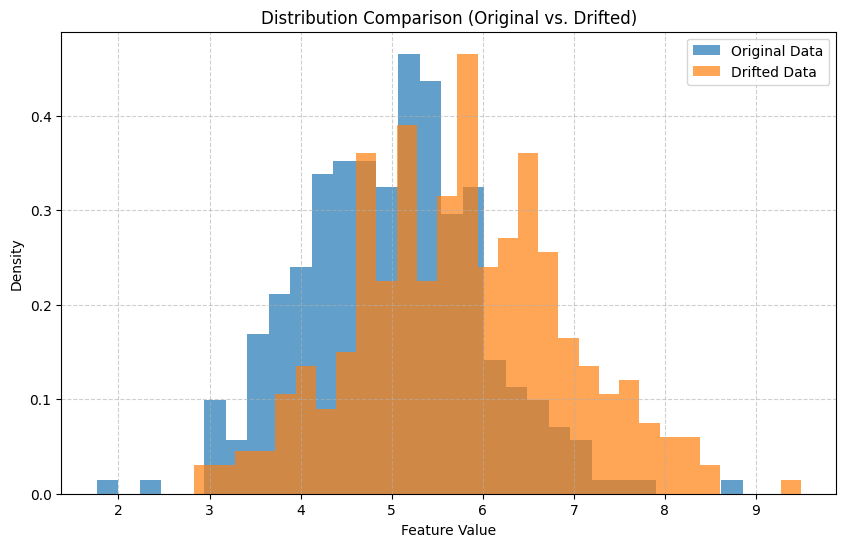

--- Displaying Distribution Comparison Plot ---

--- Performing Kolmogorov-Smirnov Test ---
KS Test Statistic: 0.3100
P-value: 0.0000

--- Interpretation ---
P-value (0.0000) is less than alpha (0.05).
Reject the null hypothesis (H0).
Conclusion: Significant data drift detected.


In [11]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt # Optional: for visualization

# --- Introduction ---
# This script demonstrates using the Kolmogorov-Smirnov (KS) test
# from SciPy to detect data drift between two samples of a feature.
# The KS test assesses whether two samples are drawn from the same
# continuous distribution.
#
# We will:
# 1. Generate synthetic "original" data for a feature.
# 2. Generate synthetic "drifted" data with a different distribution.
# 3. Perform the two-sample KS test using scipy.stats.ks_2samp.
# 4. Interpret the test results (p-value) to detect drift.

# --- 1. Generate Original Data ---
# Simulate a feature 'Feature_A' with a normal distribution
# Mean = 5, Standard Deviation = 1
np.random.seed(42) # for reproducibility
original_data = np.random.normal(loc=5, scale=1, size=300) # 300 samples

print("--- Original Data Generated ---")
print(f"Shape of original_data: {original_data.shape}\n")

# --- 2. Generate Drifted Data ---
# Simulate data drift by changing the distribution of 'Feature_A'
# Option A: Shifted mean
# drifted_data = np.random.normal(loc=6, scale=1, size=300)

# Option B: Different standard deviation
# drifted_data = np.random.normal(loc=5, scale=1.5, size=300)

# Option C: Different distribution type (e.g., uniform)
# drifted_data = np.random.uniform(low=3, high=7, size=300)

# Option D: Combination (Shifted mean and different std dev) - Let's use this one
drifted_data = np.random.normal(loc=5.8, scale=1.2, size=300)


print("--- Drifted Data Generated ---")
print(f"Shape of drifted_data: {drifted_data.shape}\n")

# --- Optional: Visualize the distributions ---
# Plot histograms to visually inspect the distributions
plt.figure(figsize=(10, 6))
plt.hist(original_data, bins=30, alpha=0.7, label='Original Data', density=True)
plt.hist(drifted_data, bins=30, alpha=0.7, label='Drifted Data', density=True)
plt.title("Distribution Comparison (Original vs. Drifted)")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
print("--- Displaying Distribution Comparison Plot ---\n")


# --- 3. Perform Kolmogorov-Smirnov (KS) Test ---
# Use the ks_2samp function from scipy.stats
# It returns the KS test statistic and the p-value.
# Null Hypothesis (H0): The two samples are drawn from the same distribution.
# Alternative Hypothesis (H1): The two samples are drawn from different distributions.
print("--- Performing Kolmogorov-Smirnov Test ---")
ks_statistic, p_value = stats.ks_2samp(original_data, drifted_data)

print(f"KS Test Statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}\n")

# --- 4. Interpret the Results ---
# Interpret the p-value to determine if drift is detected.
# A common significance level (alpha) is 0.05.
alpha = 0.05

print("--- Interpretation ---")
if p_value < alpha:
    print(f"P-value ({p_value:.4f}) is less than alpha ({alpha}).")
    print("Reject the null hypothesis (H0).")
    print("Conclusion: Significant data drift detected.")
else:
    print(f"P-value ({p_value:.4f}) is greater than or equal to alpha ({alpha}).")
    print("Fail to reject the null hypothesis (H0).")
    print("Conclusion: No significant data drift detected based on the KS test.")

# --- Conclusion ---
# The KS test provides a statistical measure to compare two distributions.
# A low p-value suggests that the two samples are likely from different
# distributions, indicating potential data drift. The choice of alpha
# depends on the desired confidence level.



